In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
  

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
stop = set(stopwords.words('english'))
for w in ['wa','ha','us','place','translated','great','people','church','aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']:
    STOPWORDS.add(w)

In [5]:
def read_reviews(folder,fname):
    test=pd.read_csv(folder + fname )
    return test['review'].str.cat(sep=' ').replace('\n', ' ')

In [6]:
def lemmatize(string,on_off):
    if on_off == 0:
        return string
    if on_off == 1:
        lemmatizer = WordNetLemmatizer()
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(string)])
        return lemmatized_output

In [8]:
def wordCloud(denom,lem):
    mypath='C:/Users/aben_/Documents/ISYE 6740/Homework/project/' + denom + '/'
    df = pd.DataFrame(columns =['church','reviews','denomination'])
    
    files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for file in files:
        review_text = lemmatize(read_reviews(mypath,file),lem)
        row_to_append = pd.DataFrame([{'church':file.split('.')[0], 'reviews':review_text,"denomination": 2}])
        df = pd.concat([df,row_to_append])

    # Word Cloud by total words
    text = df['reviews'].str.cat(sep=' ').replace('\n', ' ').lower()
    
    #create the wordcloud object
    wordcloud = WordCloud(stopwords = STOPWORDS,collocations=True,collocation_threshold=2,min_word_length=4,background_color='white').generate(text)
    
    #plot the wordcloud object
    figure(figsize=(10, 8), dpi=80)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()    
    
    #word cloud by word count (DTM)
    cv=CountVectorizer(stop_words=STOPWORDS, ngram_range=(1, 3))
    X = cv.fit_transform([df['reviews'].str.cat(sep=' ').replace('\n', ' ').lower()])
    X = X.toarray()
    bow=pd.DataFrame(X, columns = cv.get_feature_names_out())
    bow.to_csv(denom + 'csv')
    
    bow_text=bow.iloc[0].sort_values(ascending=False)[:4000]

    # create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
    bow_text_dict=bow.loc[0].sort_values(ascending=False).to_dict()
    
    # create the WordCloud object
    wordcloud = WordCloud(min_word_length =4,background_color='white')

    # generate the word cloud
    wordcloud.generate_from_frequencies(bow_text_dict)

    #plot
    figure(figsize=(10, 8), dpi=80)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

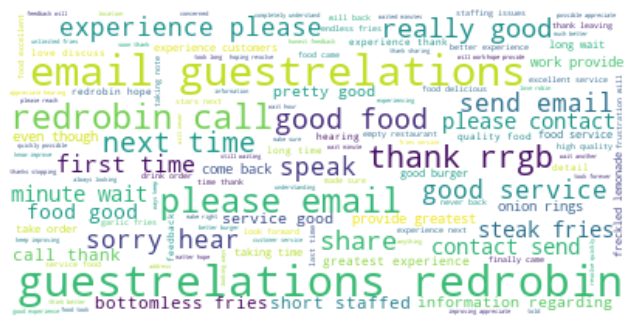

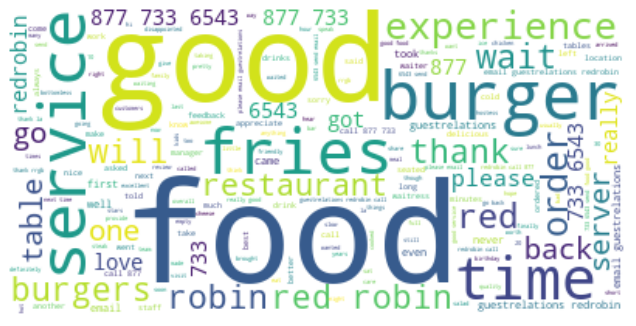

In [9]:
wordCloud('rr',0)

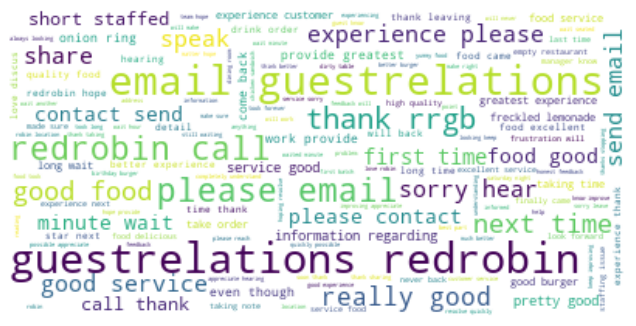

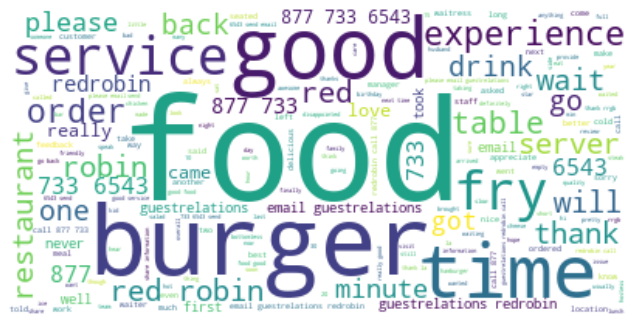

In [10]:
wordCloud('rr',1)

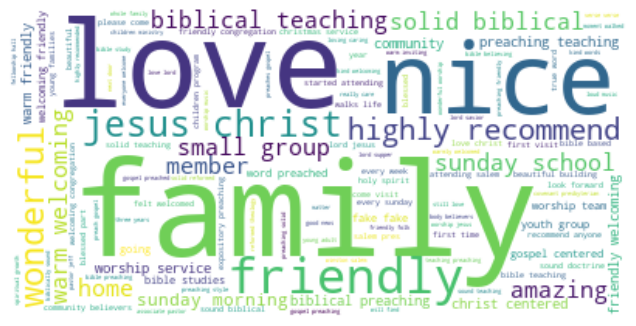

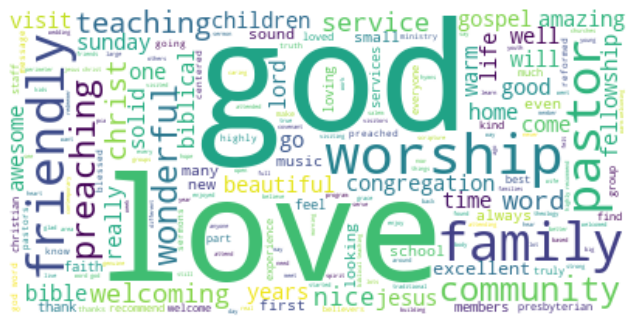

In [15]:
wordCloud('pca',0)

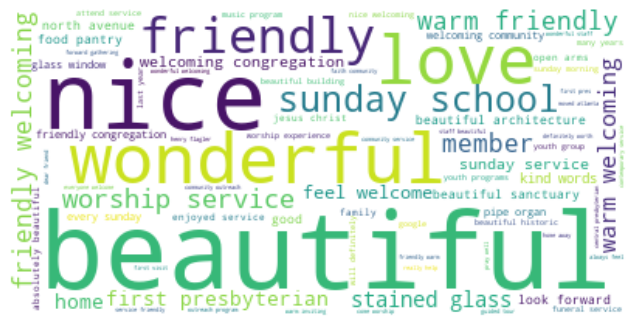

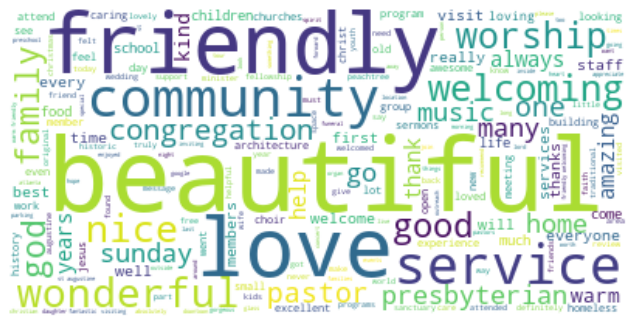

In [17]:
wordCloud('pcusa',0)